In [66]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
pd.set_option('display.float_format', '{:,.2f}'.format)

# Exploring the Data

In [2]:
import chardet

with open(r'E:\Yara Khaled\IT\DEPI\Final Project\DataCoSupplyChainDataset.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [33]:
Data = pd.read_csv(r'E:\Yara Khaled\IT\DEPI\Final Project\DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
Data

In [34]:
# Checking the data types of columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [35]:
Data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,"180,519.00","180,519.00","180,519.00","180,519.00","180,519.00","180,519.00","180,519.00","180,516.00","180,519.00","180,519.00",...,"180,519.00","180,519.00","180,519.00","180,519.00","24,840.00","180,519.00","180,519.00",0.00,"180,519.00","180,519.00"
mean,3.50,2.93,21.97,183.11,0.55,31.85,"6,691.38","35,921.13",5.44,29.72,...,2.13,203.77,183.11,21.97,"55,426.13",692.51,31.85,NaN,141.23,0.00
std,1.62,1.37,104.43,120.04,0.50,15.64,"4,162.92","37,542.46",1.63,9.81,...,1.45,132.27,120.04,104.43,"31,919.28",336.45,15.64,NaN,139.73,0.00
min,0.00,0.00,"-4,274.98",7.49,0.00,2.00,1.00,603.00,2.00,-33.94,...,1.00,9.99,7.49,"-4,274.98","1,040.00",19.00,2.00,NaN,9.99,0.00
25%,2.00,2.00,7.00,104.38,0.00,18.00,"3,258.50",725.00,4.00,18.27,...,1.00,119.98,104.38,7.00,"23,464.00",403.00,18.00,NaN,50.00,0.00
50%,3.00,4.00,31.52,163.99,1.00,29.00,"6,457.00","19,380.00",5.00,33.14,...,1.00,199.92,163.99,31.52,"59,405.00",627.00,29.00,NaN,59.99,0.00
75%,5.00,4.00,64.80,247.40,1.00,45.00,"9,779.00","78,207.00",7.00,39.28,...,3.00,299.95,247.40,64.80,"90,008.00","1,004.00",45.00,NaN,199.99,0.00
max,6.00,4.00,911.80,"1,939.99",1.00,76.00,"20,757.00","99,205.00",12.00,48.78,...,5.00,"1,999.99","1,939.99",911.80,"99,301.00","1,363.00",76.00,NaN,"1,999.99",0.00


In [36]:
Data.describe(include='object')

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
count,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,...,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,50,563,2,1,782,1109,1,3,...,3597,164,65752,23,1089,9,118,118,63701,4
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Santo Domingo,Estados Unidos,12/14/2016 12:29,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,1/5/2016 5:58,Standard Class
freq,69295,98977,24551,66770,111146,180519,65150,64104,180519,93504,...,2211,24840,5,28341,6722,59491,24515,24515,10,107752


# Cleaning the Data

In [37]:
# Capitalize each word in the columns name 
Data.columns = Data.columns.str.title()

In [38]:
# change the data type for Date from Object to be datetime
Data['Order Date (Dateorders)'] = pd.to_datetime(Data['Order Date (Dateorders)'])
Data['Shipping Date (Dateorders)'] = pd.to_datetime(Data['Shipping Date (Dateorders)'])

In [39]:
# Check for duplicates
Data.duplicated().sum()

0

In [40]:
# Drop the unusefull columns
columns_to_drop = [
    'Category Id',
    'Customer Id',
    'Department Id',
    'Sutomer Password',
    'Customer Email',
    'Order Customer Id',
    'Customer Street',
    'Order Id',
    'Order Item Cardprod Id',
    'Order Item Id',
    'Product Card Id',
    'Product Category Id',
    'Product Description',
    'Order Zipcode',
    'Product Image',
    'Latitude'
,'Longitude',
    'Customer Password', 
    'Benefit Per Order',
    'Order Item Product Price'

]

Data = Data.drop(columns=[col for col in columns_to_drop if col in Data.columns])

In [41]:
# Check for null data and found there's no nulls
Data.isnull().sum()

Type                             0
Days For Shipping (Real)         0
Days For Shipment (Scheduled)    0
Sales Per Customer               0
Delivery Status                  0
Late_Delivery_Risk               0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Zipcode                 3
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Date (Dateorders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region                     0
Order State                      0
Order Status        

In [42]:
# Found zip codes in the state column
Data['Customer State'].value_counts().sort_values()

Customer State
91732        1
95758        2
AL          35
IA          67
MT          87
AR         164
ID         167
ND         215
OK         232
WV         241
RI         243
DE         269
KS         458
KY         487
DC         579
IN         581
SC         665
MN         672
WI         850
WA         920
LA         948
NM         949
UT         968
CT        1094
HI        1248
MO        1354
NV        1440
TN        1582
MA        1607
OR        1668
VA        1849
CO        1914
NC        1992
MD        2415
GA        2503
AZ        3026
NJ        3191
MI        3804
PA        3824
OH        4095
FL        5456
IL        7631
TX        9103
NY       11327
CA       29223
PR       69373
Name: count, dtype: int64

In [43]:
Data['Customer State'].loc[Data['Customer Zipcode']==91732]

1738      CA
1786      CA
5637      CA
9199      CA
9525      CA
          ..
177719    CA
178933    CA
178934    CA
178935    CA
180245    CA
Name: Customer State, Length: 126, dtype: object

In [44]:
Data['Customer State'].loc[Data['Customer Zipcode']==95758]

1755      CA
2806      CA
4232      CA
10017     CA
17000     CA
          ..
169529    CA
169639    CA
169835    CA
169839    CA
172121    CA
Name: Customer State, Length: 113, dtype: object

In [45]:
# Replacing the worng values in the customer state column with CA
Data['Customer State'] = Data['Customer State'].replace(['91732', '95758'], 'CA')

In [46]:
# Finding null values in the customer last name and replacing them with space then merge the two columns together
Data['Customer Lname'] = Data['Customer Lname'].fillna('')
Data['Customer Full Name'] = Data['Customer Fname']+' '+Data['Customer Lname']
Data = Data.drop(columns=['Customer Fname', 'Customer Lname','Customer Zipcode'])
Data['Customer Full Name'].isnull().sum()

0

In [47]:
Data['Customer Full Name'].value_counts().reset_index()

,Customer Full Name,count
0,Mary Smith,23884
1,Robert Smith,744
2,James Smith,726
3,David Smith,723
4,John Smith,645
...,...,...
14028,Kevyn Christensen,1
14029,Karleigh Conley,1
14030,Linda Workman,1
14031,Mari Beach,1


In [48]:
# Found the most repeated country is USA but in the name of EE. UU.
Data['Customer Country'].value_counts().reset_index()

,Customer Country,count
0,EE. UU.,111146
1,Puerto Rico,69373


In [49]:
# Replace the name of EE. UU. in Spanish to be USA in English 
Data['Customer Country'] = Data['Customer Country'].replace('EE. UU.', 'USA')

In [50]:
# Get the number of delayed days with substracting Days For Shipping (Real)- Days For Shipment (Scheduled)
Data['Shipping Delay (Days)'] = Data['Days For Shipping (Real)'] - Data['Days For Shipment (Scheduled)']

In [51]:
# Get the Average of days delayed
average_shipping_delay = Data['Shipping Delay (Days)'].mean()
round(average_shipping_delay,1)

0.6

In [52]:
# Replacing the values in the late delivery risk column with string values
Data['Late_Delivery_Risk'] = Data['Late_Delivery_Risk'].replace({0: 'Not Late', 1: 'Late'})

In [53]:
# Found there's a lot of late delivery
Data['Late_Delivery_Risk'].value_counts().reset_index()

,Late_Delivery_Risk,count
0,Late,98977
1,Not Late,81542


In [54]:
# Found there's different words in the same meaning so we will unifies the words 
Data['Order Status'].value_counts().reset_index()

,Order Status,count
0,COMPLETE,59491
1,PENDING_PAYMENT,39832
2,PROCESSING,21902
3,PENDING,20227
4,CLOSED,19616
5,ON_HOLD,9804
6,SUSPECTED_FRAUD,4062
7,CANCELED,3692
8,PAYMENT_REVIEW,1893


In [55]:
Data['Order Status'] = Data['Order Status'].replace({
    'CLOSED': 'COMPLETE',
    'ON_HOLD': 'PROCESSING'
})

In [56]:
# Replace the integer values in product status to string values
Data['Product Status'] = Data['Product Status'].replace({
    0: 'Available',
    1: 'Not Available'
})

In [57]:

def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create the new column
Data['Season'] = Data['Order Date (Dateorders)'].apply(get_season)

# Analysis

<Axes: xlabel='Customer City'>

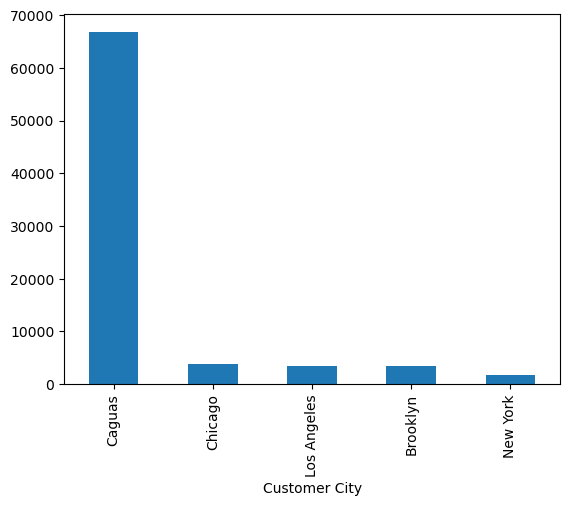

In [32]:
Data['Customer City'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar')

<Axes: ylabel='count'>

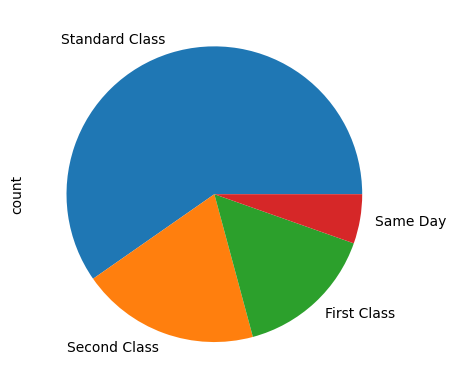

In [33]:
# The hieghts ordered shipping mode
Data['Shipping Mode'].value_counts().plot(kind='pie')

In [35]:
# Found there's profit in negative so try to get if it's because of delaying 
Data[['Shipping Delay (Days)']].loc[Data['Order Item Profit Ratio']<-1].mean()

Shipping Delay (Days)   0.59
dtype: float64

In [36]:
# Get the product with the lowest profit 
lowest_profit = pd.pivot_table(Data,index=['Product Name'],values=['Order Profit Per Order'],
                               aggfunc='mean').reset_index().sort_values(by='Order Profit Per Order').head(1)
lowest_profit

,Product Name,Order Profit Per Order
77,SOLE E35 Elliptical,-64.34


In [37]:
# Get the product with the Highest profit 

highest_profit = pd.pivot_table(Data,index=['Product Name'],values=['Order Profit Per Order'],
                                aggfunc='mean').reset_index().sort_values(by='Order Profit Per Order').tail(1)
highest_profit

,Product Name,Order Profit Per Order
18,Dell Laptop,157.59


In [38]:
# Try to get if there's a relationship between discound and the profit for each product
# and found when the discound is very low 
lowest_Discount_Profit = pd.pivot_table(Data,index=['Product Name'],values=['Order Item Discount Rate',
                                                                            'Order Profit Per Order'],
                                aggfunc='mean').reset_index().sort_values(by='Order Item Discount Rate').head(5)
lowest_Discount_Profit

,Product Name,Order Item Discount Rate,Order Profit Per Order
76,SOLE E25 Elliptical,0.06,-16.96
72,Polar FT4 Heart Rate Monitor,0.08,57.95
9,Bushnell Pro X7 Jolt Slope Rangefinder,0.08,-23.27
80,Stiga Master Series ST3100 Competition Indoor,0.09,17.75
51,Merrell Women's Grassbow Sport Waterproof Hik,0.09,17.75


In [39]:
Highest_Discount_Profit = pd.pivot_table(Data,index=['Product Name'],values=['Order Item Discount Rate','Order Profit Per Order'],
                                aggfunc='mean').reset_index().sort_values(by='Order Item Discount Rate',
                        ascending=False).head(5)
Highest_Discount_Profit

,Product Name,Order Item Discount Rate,Order Profit Per Order
4,Bowflex SelectTech 1090 Dumbbells,0.14,119.08
77,SOLE E35 Elliptical,0.12,-64.34
19,Diamondback Boys' Insight 24 Performance Hybr,0.12,59.68
45,LIJA Women's Mid-Length Panel Golf Shorts,0.12,40.89
8,Brooks Women's Ghost 6 Running Shoe,0.11,39.50


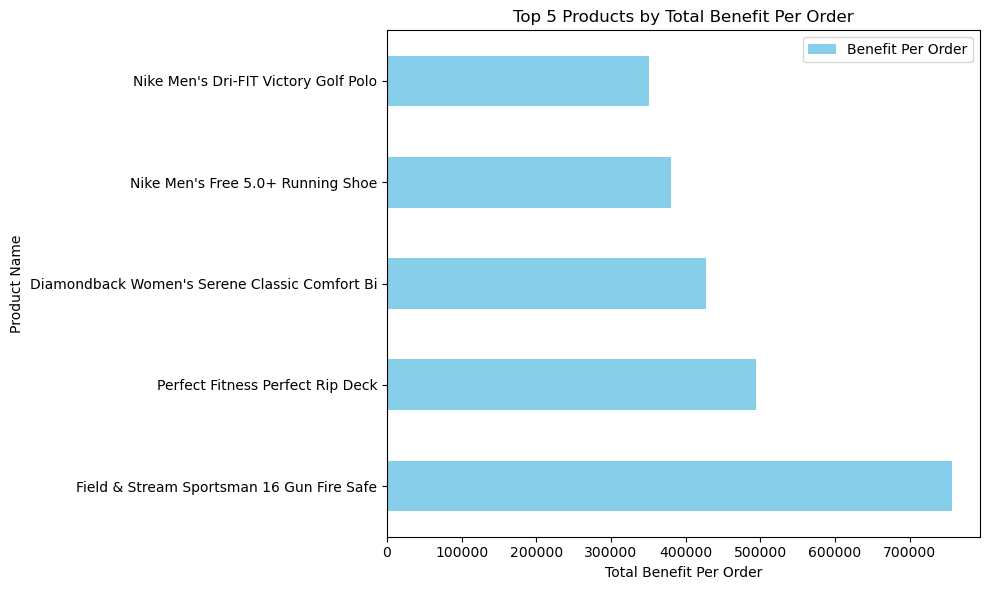

In [40]:
Data.groupby(['Department Name', 'Product Name'])['Benefit Per Order'] \
    .sum() \
    .sort_values(ascending=False) \
    .reset_index() \
    .head(5) \
    .plot(kind='barh', x='Product Name', y='Benefit Per Order', figsize=(10, 6), color='skyblue')

# Add labels and title
plt.xlabel('Total Benefit Per Order')
plt.ylabel('Product Name')
plt.title('Top 5 Products by Total Benefit Per Order')
plt.tight_layout()
plt.show()


# Export the Data to CSV File

In [41]:
Data.to_csv('Supply_Chain.csv', index=False,encoding='utf-8')

In [67]:
server = 'Yara'
database = 'Supply_Chain'
username = ''
password = ''

connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)

In [ ]:
Data.to_sql('Supply_Chain', con=engine, if_exists='replace', index=False)
print(f"✅ Uploaded:")

# We Found there's alot of latency and loss in profitablity so we need to focus more on them in the analysis

# Thank You!